# Sodium LGS

> Simulate a sodium LGS beacon

In [ ]:
#| hide
from fastcore.test import test_close

Import the `LGSSystem` class from the pylgs module:

In [ ]:
from pylgs.lgssystem import LGSSystem
import numpy as np
import pymor

Define an LGS system on the D$_2$ line with pump and repump beams, with all parameters fixed except for the light intensities and the magnetic-field strength:

In [ ]:
lgs = LGSSystem(
    'NaD2_Repump', 
    {
        'EllipticityDegrees1': 45.,
        'PolarizationAngleDegrees1': 0,
        'DetuningHz1': 1.0832e9,
        'LaserWidthHz1': 10.0e6,
        'EllipticityDegrees2': 45.,
        'PolarizationAngleDegrees2': 0,
        'DetuningHz2': -6.268e8,
        'LaserWidthHz2': 10.0e6,
        'MagneticZenithDegrees': 45.,
        'MagneticAzimuthDegrees': 45.,
        'SDampingCollisionRatePerS': 4081.63,
        'BeamTransitRatePerS': 131.944,
        'VccRatePerS': 28571.,
        'TemperatureK': 185.,
        'RecoilParameter': 1
    }
)

The model contains equations for 374 density-matrix elements:

In [ ]:
lgs.A_ind.range

XarrayVectorSpace(
    coords=Coordinates:
             * Density matrix (range)  (Density matrix (range)) <U68 102kB 'ρ<sub>Re, (3...,
    name='A_ind')

Define sample values for the variable parameters:

In [ ]:
params = {'IntensitySI1': 5., 'IntensitySI2': 46., 'BFieldG': 0.5}

## Steady state of a cw LGS

### Evenly spaced velocity groups

Build a model for the steady state of a cw LGS with 200 evenly spaced velocity groups:

In [ ]:
model = lgs.stationary_model(vg=200)

Find the steady-state return flux:

In [ ]:
model.total_flux(params).item()

13625.270307926916

In [ ]:
#| hide
test_close(_, 13625.272, eps=1e-2)

Find the density matrix for each of the 200 velocity groups:

In [ ]:
sol = model.solve(params)
sol

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Atomic velocity          (Atomic velocity) float64 2kB -2.985 ... 2.985
                 * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    XarrayVectorArrayImpl(
        <xarray.DataArray (Atomic velocity: 200, Density matrix (source): 374)> Size: 598kB
        array([[ 4.39820989e-07,  1.36790153e-07, -1.36692297e-07, ...,
                 4.11349076e-11,  2.15032837e-13,  3.90993999e-14],
               [ 5.25623820e-07,  1.63475922e-07, -1.63358570e-07, ...,
                 4.96457650e-11,  2.62098981e-13,  4.73161225e-14],
               [ 6.27016980e-07,  1.95009270e-07, -1.94868909e-07, ...,
                 5.98154463e-11,  3.18954046e-13,  5.71688740e-14],
               ...,
               [ 6.25164298e-07,  1.95204690e-07, -1.95037857e-07, ...,
                -6.26906845e-11,  3.50162745e-13,  6.07662656e-14],
               [ 5.24087271e-07,  1.63638177e-07, -1.63498877e-07, ...,
                -5.20072904e-11,  2.87471533e-13,  5.02408015e-14],
               [ 4.38562256e-07,  1.36929700e-07, -1.36813585e-07, ...,
                -4.30715543e-11,  2.35630633e-13,  4.14736854e-14]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 2kB -2.985 ... 2.985
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...,
        <xarray.DataArray (Atomic velocity: 200, Density matrix (source): 374)> Size: 598kB
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 2kB -2.985 ... 2.985
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    _len=1)

The result is expressed as an `XarrayVectorArray` object representing 200 vectors each of size 374. The `XarrayVectorArray` is a wrapper for an xarray `DataArray`, which can be accessed via the `XarrayVectorArray.array` attribute:

In [ ]:
sol.array

<xarray.DataArray (Atomic velocity: 200, Density matrix (source): 374)> Size: 598kB
array([[ 4.39820989e-07,  1.36790153e-07, -1.36692297e-07, ...,
         4.11349076e-11,  2.15032837e-13,  3.90993999e-14],
       [ 5.25623820e-07,  1.63475922e-07, -1.63358570e-07, ...,
         4.96457650e-11,  2.62098981e-13,  4.73161225e-14],
       [ 6.27016980e-07,  1.95009270e-07, -1.94868909e-07, ...,
         5.98154463e-11,  3.18954046e-13,  5.71688740e-14],
       ...,
       [ 6.25164298e-07,  1.95204690e-07, -1.95037857e-07, ...,
        -6.26906845e-11,  3.50162745e-13,  6.07662656e-14],
       [ 5.24087271e-07,  1.63638177e-07, -1.63498877e-07, ...,
        -5.20072904e-11,  2.87471533e-13,  5.02408015e-14],
       [ 4.38562256e-07,  1.36929700e-07, -1.36813585e-07, ...,
        -4.30715543e-11,  2.35630633e-13,  4.14736854e-14]])
Coordinates:
  * Atomic velocity          (Atomic velocity) float64 2kB -2.985 ... 2.985
  * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...

Use the density-matrix solution to find the velocity distribution of flux as an `XarrayVectorArray`:

In [ ]:
flux = model.flux_distribution(sol)
flux

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Atomic velocity  (Atomic velocity) float64 2kB -2.985 -2.955 ... 2.955 2.985
                 * Transition       (Transition) <U33 132B '3P<sub>3/2</sub>→3S<sub>1/2</sub>',
        name='Flux'),
    XarrayVectorArrayImpl(
        <xarray.DataArray 'Flux' (Transition: 1, Atomic velocity: 200)> Size: 2kB
        array([[1.45154999e-03, 1.75836736e-03, 2.12665496e-03, 2.56805612e-03,
                3.09623750e-03, 3.72725057e-03, 4.47991582e-03, 5.37626271e-03,
                6.44203350e-03, 7.70725861e-03, 9.20691204e-03, 1.09816577e-02,
                1.30786973e-02, 1.55527311e-02, 1.84670458e-02, 2.18947452e-02,
                2.59201356e-02, 3.06402884e-02, 3.61667989e-02, 4.26277551e-02,
                5.01699518e-02, 5.89613644e-02, 6.91939141e-02, 8.10865587e-02,
                9.48887326e-02, 1.10884179e-01, 1.29395214e-01, 1.50787462e-01,
                1.75475105e-01, 2.03926715e-01, 2.36671706e-01, 2.74307475e-01,
                3.17507316e-01, 3.67029162e-01, 4.23725250e-01, 4.88552816e-01,
                5.62585915e-01, 6.47028475e-01, 7.43228771e-01, 8.52695425e-01,
                9.77115099e-01, 1.11837221e+00, 1.27857069e+00, 1.46005823e+00,
                1.66545339e+00, 1.89767563e+00, 2.15997897e+00, 2.45598993e+00,
                2.78974972e+00, 3.16576210e+00, 3.58904754e+00, 4.06520416e+00,
                4.60047745e+00, 5.20183989e+00, 5.87708178e+00, 6.63491594e+00,
                7.48509904e+00, 8.43857113e+00, 9.50761943e+00, 1.07060695e+01,
                1.20495091e+01, 1.35555535e+01, 1.52441602e+01, 1.71380034e+01,
                1.92629231e+01, 2.16484667e+01, 2.43285450e+01, 2.73422309e+01,
                3.07347398e+01, 3.45586388e+01, 3.88753488e+01, 4.37570248e+01,
                4.92889249e+01, 5.55724230e+01, 6.27288699e+01, 7.09045897e+01,
                8.02774109e+01, 9.10652942e+01, 1.03537868e+02, 1.18032050e+02,
        ...
                1.20324072e+02, 1.05498993e+02, 9.27447703e+01, 8.17172494e+01,
                7.21404302e+01, 6.37908689e+01, 5.64860783e+01, 5.00758032e+01,
                4.44353879e+01, 3.94606835e+01, 3.50641018e+01, 3.11715298e+01,
                2.77198982e+01, 2.46552499e+01, 2.19311950e+01, 1.95076655e+01,
                1.73499062e+01, 1.54276510e+01, 1.37144472e+01, 1.21870969e+01,
                1.08251945e+01, 9.61073988e+00, 8.52781462e+00, 7.56230880e+00,
                6.70168970e+00, 5.93480518e+00, 5.25171562e+00, 4.64354947e+00,
                4.10237894e+00, 3.62111253e+00, 3.19340118e+00, 2.81355685e+00,
                2.47648113e+00, 2.17760227e+00, 1.91281996e+00, 1.67845642e+00,
                1.47121286e+00, 1.28813091e+00, 1.12655823e+00, 9.84117655e-01,
                8.58679633e-01, 7.48337528e-01, 6.51385293e-01, 5.66297506e-01,
                4.91711302e-01, 4.26410069e-01, 3.69308772e-01, 3.19440653e-01,
                2.75945226e-01, 2.38057419e-01, 2.05097770e-01, 1.76463550e-01,
                1.51620743e-01, 1.30096814e-01, 1.11474161e-01, 9.53842207e-02,
                8.15021520e-02, 6.95420415e-02, 5.92525939e-02, 5.04132608e-02,
                4.28307566e-02, 3.63359416e-02, 3.07810288e-02, 2.60370821e-02,
                2.19917866e-02, 1.85474585e-02, 1.56192710e-02, 1.31336804e-02,
                1.10270270e-02, 9.24429514e-03, 7.73801713e-03, 6.46730503e-03,
                5.39699594e-03, 4.49690103e-03, 3.74114494e-03, 3.10758677e-03,
                2.57731283e-03, 2.13419374e-03, 1.76449943e-03, 1.45655478e-03]])
        Coordinates:
          * Transition       (Transition) <U33 132B '3P<sub>3/2</sub>→3S<sub>1/2</sub>'
          * Atomic velocity  (Atomic velocity) float64 2kB -2.985 -2.955 ... 2.955 2.985,
        <xarray.DataArray 'Flux' (Atomic velocity: 200, Transition: 1)> Size: 2kB
        array([[0.],
               [0.],
               [0.],
               [0.],
               [0.],
       

`XarrayVectorArray` objects have built-in visualization routines. Plot the velocity distribution of return flux:

In [ ]:
model.flux_distribution(sol).visualize(xaxis_range=(-.5, .5))

Plot the level population distribution:

In [ ]:
model.level_population_distribution(sol).visualize()

### Adaptive refinement of velocity groups

Build a steady-state model with each velocity group contributing no more than 2% of the return flux:

In [ ]:
model = lgs.adaptive_stationary_model(params, max_weight=0.02)

Find the total flux for this model:

In [ ]:
model.total_flux(params).item()

13521.856397884763

In [ ]:
#| hide
test_close(_, 13521.857, eps=1e-2)

Find the density matrix. In this case the adaptive refinement has produced 82 velocity groups:

In [ ]:
sol = model.solve(params)
sol

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
                 * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    XarrayVectorArrayImpl(
        <xarray.DataArray (Atomic velocity: 82, Density matrix (source): 374)> Size: 245kB
        array([[ 4.44509942e-04,  1.36091052e-04, -1.35996342e-04, ...,
                 5.04360745e-08,  3.13451727e-10,  5.04876124e-11],
               [ 1.45887630e-02,  4.46721836e-03, -4.46295802e-03, ...,
                 2.70911678e-06,  2.75753906e-08,  3.64921589e-09],
               [ 1.26044888e-02,  3.86769040e-03, -3.86086302e-03, ...,
                 3.88704008e-06,  6.57921093e-08,  7.98942251e-09],
               ...,
               [ 1.24522715e-02,  3.87768769e-03, -3.86835999e-03, ...,
                -4.56188144e-06,  9.01969129e-08,  1.08025371e-08],
               [ 1.45005020e-02,  4.47569123e-03, -4.47010991e-03, ...,
                -2.97033886e-06,  3.30992869e-08,  4.28594925e-09],
               [ 4.43024226e-04,  1.36270790e-04, -1.36153869e-04, ...,
                -5.32867876e-08,  3.49647032e-10,  5.46597999e-11]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...,
        <xarray.DataArray (Atomic velocity: 82, Density matrix (source): 374)> Size: 245kB
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    _len=1)

The flux distribution shows that this is a more detailed description of the system than the model with a greater number of evenly spaced velocity groups:

In [ ]:
model.flux_distribution(sol).visualize(xaxis_range=(-.5, .5))

### Dependence on system parameters

Find the steady-state density matrix for 10 different values of repump intensity, with the total pump + repump intensity held constant:

In [ ]:
sol = model.solve([
    {'BFieldG': .5},
    {
        'IntensitySI1': np.linspace(0, 25, 10), 
        'IntensitySI2': 50 - np.linspace(0, 25, 10)
    }
])
sol

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
                 * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    XarrayVectorArrayImpl(
        <xarray.DataArray (IntensitySI1: 10, Atomic velocity: 82,
                           Density matrix (source): 374)> Size: 2MB
        array([[[ 2.84741873e-04,  7.60633045e-05, -7.60111065e-05, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 9.34061346e-03,  2.49835328e-03, -2.49584981e-03, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 8.05861585e-03,  2.16697110e-03, -2.16267760e-03, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                ...,
                [ 7.96427386e-03,  2.17609099e-03, -2.17017710e-03, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 9.28660019e-03,  2.50480577e-03, -2.50147389e-03, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 2.83838102e-04,  7.61913952e-05, -7.61254832e-05, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

               [[ 4.01699066e-04,  1.20402839e-04, -1.20313990e-04, ...,
                  4.17564371e-08,  2.59508211e-10,  3.09733581e-11],
                [ 1.31811508e-02,  3.95224030e-03, -3.94826923e-03, ...,
                  2.24335963e-06,  2.28344234e-08,  2.24631173e-09],
                [ 1.13815133e-02,  3.42175081e-03, -3.41544436e-03, ...,
                  3.22055637e-06,  5.45106173e-08,  4.92853212e-09],
        ...
                [ 1.76007176e-02,  5.72239708e-03, -5.71485983e-03, ...,
                 -6.30235172e-06,  1.24606729e-07,  3.15669328e-08],
                [ 2.04090081e-02,  6.60686641e-03, -6.60292977e-03, ...,
                 -4.12235696e-06,  4.59360834e-08,  1.26554458e-08],
                [ 6.22589027e-04,  2.01194581e-04, -2.01123360e-04, ...,
                 -7.40494967e-08,  4.85881248e-10,  1.63604252e-10]],

               [[ 6.43985672e-04,  2.08149736e-04, -2.08105510e-04, ...,
                  7.04584916e-08,  4.37889557e-10,  1.61340412e-10],
                [ 2.11471513e-02,  6.83282102e-03, -6.83033108e-03, ...,
                  3.77328843e-06,  3.84075594e-08,  1.14886160e-08],
                [ 1.83094758e-02,  5.91545998e-03, -5.91046665e-03, ...,
                  5.37081853e-06,  9.09074102e-08,  2.48009540e-08],
                ...,
                [ 1.81826725e-02,  5.92391159e-03, -5.91694705e-03, ...,
                 -6.34100520e-06,  1.25371006e-07,  3.36839135e-08],
                [ 2.10739187e-02,  6.84013791e-03, -6.83658934e-03, ...,
                 -4.15204507e-06,  4.62669228e-08,  1.35143578e-08],
                [ 6.42757269e-04,  2.08306434e-04, -2.08244240e-04, ...,
                 -7.46058875e-08,  4.89532207e-10,  1.74651258e-10]]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...
          * IntensitySI1             (IntensitySI1) float64 80B 0.0 2.778 ... 22.22 25.0,
        <xarray.DataArray (Atomic velocity: 82, Density matrix (source): 374)> Size: 245kB
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    _len=10)

Plot the total flux to show the optimal value of repump intensity for these conditions:

In [ ]:
model.total_flux(sol).visualize()

Create an animation of the flux distribution as the repump intensity is varied:

In [ ]:
model.flux_distribution(sol).visualize(xaxis_range=(-.5, .5))

Animate the level population distribution as a function of repump intensity:

In [ ]:
model.level_population_distribution(sol).visualize()

## Transient dynamics

### Transient dynamics from a laser pulse

Build a dynamical model (`InstationaryModel`) using the velocity groups from the adaptively refined steady-state model:

In [ ]:
model = lgs.instationary_model(
    vg=model.data['velocity_groups'], 
    T=1e-5, 
    num_values=100
)

Set tolerances for the BDF solver:

In [ ]:
pymor.basic.set_defaults({
    'pylgs.pymor.timestepping.cvode_solver_options.cvode_bdf_atol': 1e-6,
    'pylgs.pymor.timestepping.cvode_solver_options.cvode_bdf_rtol': 1e-4,
})

Solve for the density-matrix evolution. The solution contains the density matrix for each velocity group at 100 time values:

In [ ]:
sol = model.solve(params)
sol

FloatProgress(value=0.0, bar_style='info', max=1e-05)

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
                 * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    XarrayVectorArrayImpl(
        <xarray.DataArray (Time: 100, Atomic velocity: 82, Density matrix (source): 374)> Size: 25MB
        array([[[ 2.90977780e-04,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 9.53884200e-03,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 8.22157246e-03,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                ...,
                [ 8.22157246e-03,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 9.53884200e-03,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                [ 2.90977780e-04,  0.00000000e+00,  0.00000000e+00, ...,
                  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

               [[ 2.90984380e-04,  7.90655516e-10,  6.84165383e-10, ...,
                  1.03179825e-07,  6.41182998e-10,  9.79932419e-11],
                [ 9.53921225e-03,  4.62340287e-08,  4.01098781e-08, ...,
                  5.53912084e-06,  5.63722876e-08,  7.28739917e-09],
                [ 8.22227912e-03,  9.17398401e-08,  7.93194371e-08, ...,
                  7.93666011e-06,  1.34300580e-07,  1.61607778e-08],
        ...
                [ 8.33710810e-03,  1.29566747e-04, -1.11431629e-04, ...,
                 -9.39712264e-06,  1.85861601e-07,  2.20966314e-08],
                [ 9.65774064e-03,  1.31603620e-04, -1.14780009e-04, ...,
                 -6.12416063e-06,  6.82567290e-08,  8.64567705e-09],
                [ 2.94451588e-04,  3.83924558e-06, -3.36133223e-06, ...,
                 -1.09897287e-07,  7.21192549e-10,  1.06866931e-10]],

               [[ 2.94412926e-04,  4.00161741e-06, -3.33823043e-06, ...,
                  1.04078485e-07,  6.46782881e-10,  9.82982648e-11],
                [ 9.65777290e-03,  1.36917746e-04, -1.13197823e-04, ...,
                  5.59095319e-06,  5.69011535e-08,  7.33777910e-09],
                [ 8.34076670e-03,  1.32511359e-04, -1.07229955e-04, ...,
                  8.02434717e-06,  1.35787929e-07,  1.63245701e-08],
                ...,
                [ 8.33565399e-03,  1.34489560e-04, -1.11143678e-04, ...,
                 -9.39939488e-06,  1.85907109e-07,  2.21024190e-08],
                [ 9.65611866e-03,  1.36776385e-04, -1.14595103e-04, ...,
                 -6.12542728e-06,  6.82710421e-08,  8.64742846e-09],
                [ 2.94401608e-04,  3.99170853e-06, -3.35769043e-06, ...,
                 -1.09918937e-07,  7.21337173e-10,  1.06892975e-10]]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...
          * Time                     (Time) float64 800B 0.0 1.01e-07 ... 1e-05,
        <xarray.DataArray (Atomic velocity: 82, Density matrix (source): 374)> Size: 245kB
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])
        Coordinates:
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    _len=100)

Plot the total flux as a function of time:

In [ ]:
model.total_flux(sol).visualize()

Animate the flux distribution as a function of time:

In [ ]:
model.flux_distribution(sol).visualize()

Animate the level population distribution:

In [ ]:
model.level_population_distribution(sol).visualize(xaxis_range=(-1, 1))

### Transient dynamics with modulated laser intensity

Solve the `InstationaryModel` with sinusoidally modulated light intensity:

In [ ]:
sol = model.solve({
    'IntensitySI1': "5.*sin(1e6*t)**2", 
    'IntensitySI2': "46.*sin(1e6*t)**2",
    'BFieldG': .5
})

The total flux as a function of time:

In [ ]:
model.total_flux(sol).visualize()

The animated flux distribution:

In [ ]:
model.flux_distribution(sol).visualize(xaxis_range=(-.25, .25))

The animated level population distribution:

In [ ]:
model.level_population_distribution(sol).visualize(xaxis_range=(-.25, .25))

## Periodic state of a modulated system

The `StationaryFloquetModel` solves for the periodic state of a modulated system after the transient dynamics have died out.

Build a stationary Floquet model for six Fourier harmonics of a system with sinusoidally modulated intensity:

In [ ]:
model = lgs.stationary_floquet_model(
    {
        'IntensitySI1': "5.*sin(nu*t)**2", 
        'IntensitySI2': "46.*sin(nu*t)**2"
    },
    T=np.linspace(0, 1e-5, 100),
    n_vector=6,
    vg=model.data['velocity_groups']
)

Define values for the modulation frequency and magnetic field:

In [ ]:
mu = {'nu': 1e6, 'BFieldG': .5}

Solve for the periodic state. The solution contains 13 Fourier coefficients for each density-matrix element in each velocity group:

In [ ]:
sol = model.solve(mu)
sol

XarrayVectorArray(
    XarrayVectorSpace(
        coords=Coordinates:
                 * Fourier coefficient      (Fourier coefficient) int64 104B -6 -5 -4 ... 4 5 6
                 * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
                 * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...),
    XarrayVectorArrayImpl(
        <xarray.DataArray (Fourier coefficient: 13, Atomic velocity: 82,
                           Density matrix (source): 374)> Size: 6MB
        array([[[-3.65749405e-09-3.46761782e-09j,
                 -3.96353685e-09+4.94087982e-09j,
                 -3.17237114e-09+1.11846616e-09j, ...,
                  1.03381620e-12-8.16309510e-13j,
                  6.82639591e-15-4.58286794e-15j,
                  9.36100333e-13-8.58192808e-14j],
                [-1.70383182e-07-1.27463212e-07j,
                 -1.30509336e-07+2.28019037e-07j,
                 -1.15551645e-07+9.77772014e-08j, ...,
                  3.28482728e-11-4.27813112e-11j,
                  3.68837693e-13-4.11150694e-13j,
                  6.84717881e-11-4.66919676e-12j],
                [-2.34577481e-07-1.43038349e-07j,
                 -1.16433708e-07+3.06682602e-07j,
                 -1.21048732e-07+1.85521925e-07j, ...,
                 -5.56001163e-12-6.29211675e-11j,
                 -9.68135735e-15-1.07974392e-12j,
                  1.50730465e-10-8.53212720e-12j],
                ...,
                [ 7.04161953e-08-1.29882845e-07j,
        ...
                  1.50730465e-10+8.53212720e-12j],
                ...,
                [ 7.04161953e-08+1.29882845e-07j,
                 -1.36580958e-07+1.21111963e-07j,
                 -6.26390712e-08+2.17822772e-07j, ...,
                 -3.68210263e-10-1.42509438e-10j,
                  7.50429138e-12+2.23349383e-12j,
                  2.03747444e-10+1.11802265e-11j],
                [ 3.61301320e-08+1.16935656e-07j,
                 -1.43340879e-07+6.24707270e-08j,
                 -7.52836042e-08+1.75166112e-07j, ...,
                 -1.78005632e-10-7.06295097e-11j,
                  2.04591063e-12+6.28806819e-13j,
                  8.05189609e-11+5.26892728e-12j],
                [ 1.21960059e-10+3.27123185e-09j,
                 -4.19413518e-09+3.82423745e-10j,
                 -2.43151923e-09+3.87556607e-09j, ...,
                 -2.61928027e-12-1.10962540e-12j,
                  1.77627008e-14+5.91667923e-15j,
                  1.01513846e-12+8.97497100e-14j]]])
        Coordinates:
          * Fourier coefficient      (Fourier coefficient) int64 104B -6 -5 -4 ... 4 5 6
          * Atomic velocity          (Atomic velocity) float64 656B -2.5 -1.5 ... 2.5
          * Density matrix (source)  (Density matrix (source)) <U68 102kB 'ρ<sub>Re, ...,
        <xarray.DataArray (Fourier coefficient: 13, Atomic velocity: 82,
                           Density matrix (source): 374)> Size: 3MB
        array([[[0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                ...,
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.]],

               [[0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                ...,
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.]],

               [[0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                ...,
        ...
                ...,
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.]],

               [[0., 0., 0., ..., 0., 0., 0.],
                [0., 0., 0., ..., 0., 0., 0.],
             

The real and imaginary parts of the Fourier coefficients of the time-dependent return flux:

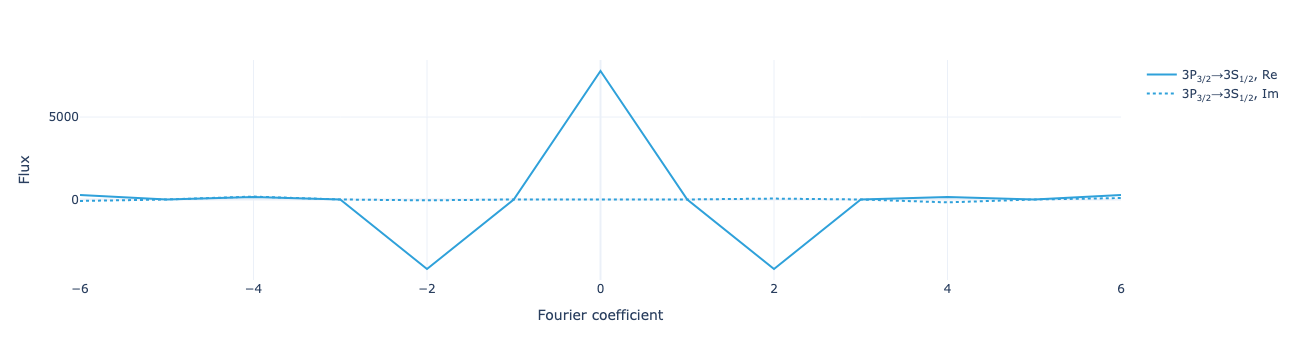

In [ ]:
model.total_flux(sol).visualize()

The total return flux reconstructed as a function of time:

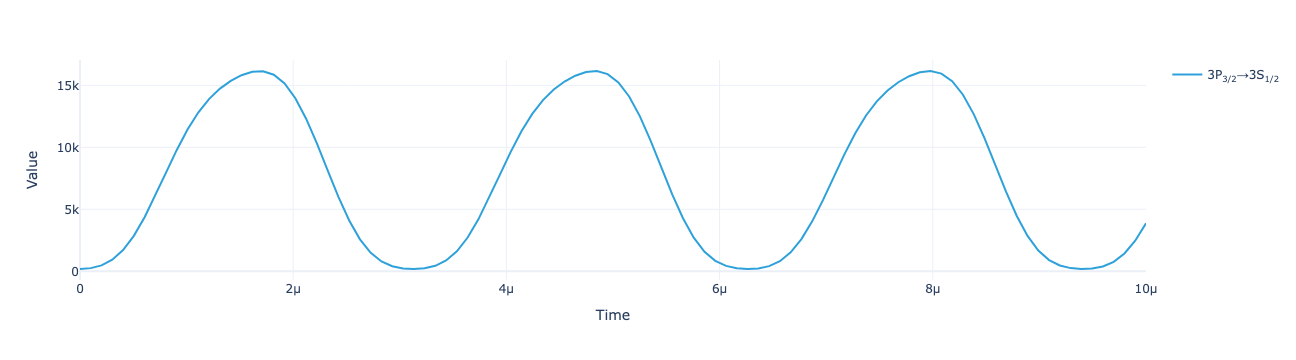

In [ ]:
model.reconstructed_total_flux(sol, mu).real.visualize()

The level population distribution as a function of time:

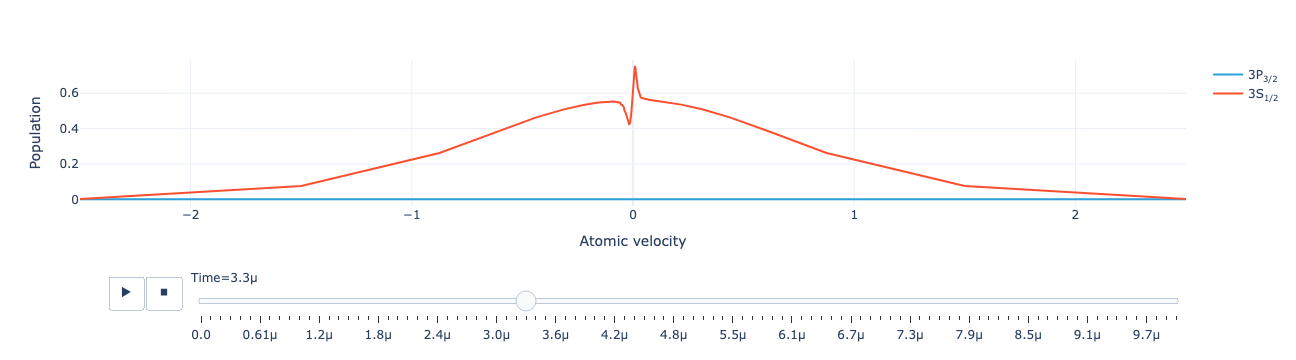

In [ ]:
model.level_population_distribution(model.reconstruct(sol, mu)).real.visualize()